#  TELCOVISION ANALYTICS   
## Customer Churn Prediction Project


## Project Overview

At **TelcoVision Analytics**, our mission is to help telecom companies use data-driven strategies to keep their customers happy and reduce the chances of them leaving

In today's competitive telecom market, **customer churn** (when people cancel their subscriptions or switch to other providers) can seriously hurt a company's revenue and growth. Bringing in new customers can cost **5 to 7 times more** than simply keeping existing ones satisfied

Right now, many companies deal with churn **reactively**, only after customers have already left. **TelcoVision Analytics** wants to change that by using **machine learning** to predict churn before it happens, allowing businesses to step in early with **personalized offers, better support and improved customer experiences**



##  Business Problem

Telecom providers often lack the ability to accurately identify customers at risk of leaving and this leads to:

- Inefficient marketing spending on blanket retention campaigns  
- Missed opportunities to retain valuable customers  
- Declining revenue and customer lifetime value

**Key Challenge:**  
How can we leverage customer demographic, billing and service usage data to accurately predict churn and proactively reduce customer attrition?

---

## Stakeholders

| Stakeholder         | Role / Interest                                                             |
|----------------------|------------------------------------------------------------------------------|
| Marketing Teams      | Use churn predictions to target high risk customers with personalized offers |
| Customer Service     | Engage with at risk customers to resolve issues early                        |
| Senior Management    | Make strategic business decisions to reduce churn and increase revenue       |
| Data Science Team    | Build and maintain churn prediction models                                   |
| Customers             | Benefit from improved service, offers and satisfaction                      |



## Business Objectives

- How can we improve customer retention by identifying and intervening on high risk customers?  
- How can we build a predictive model to classify customers as churn or non churn?  
- How can we uncover the most important factors influencing churn behavior to guide business strategy?



## Analysis Objectives

- Build and evaluate a machine learning classification model to predict customer churn  
- Start with **Logistic Regression as a baseline model** then experiment with other models (Decision Trees, Random Forest, Gradient Boosting, XGBoost) to find the best performing one  
- Identify which customer attributes like tenure, monthly charges and contract type are most predictive of churn  
- Assess how well our models distinguish between customers likely to churn and those likely to stay

---

## Data Understanding

We will use the **Telco Customer Churn Dataset** from Kaggle to build our prediction model
**Dataset Overview**
- Number of records: 7043 customers  
- Number of columns: 21 features  

**Dataset Columns**

| Column Name         | Description                                                 | Data Type                |
|----------------------|-------------------------------------------------------------|------------------------------|
| customerID            | Unique identifier for each customer                         | Categorical (ID)              |
| gender                 | Gender of the customer                                      | Categorical                    |
| SeniorCitizen          | Indicates if the customer is a senior citizen (1/0)         | Numeric (Binary)               |
| Partner                 | Whether the customer has a partner                          | Categorical                    |
| Dependents              | Whether the customer has dependents                         | Categorical                    |
| tenure                   | Number of months the customer has stayed                    | Numeric (Discrete)              |
| PhoneService             | Whether the customer has phone service                       | Categorical                    |
| MultipleLines             | Whether the customer has multiple phone lines                | Categorical                    |
| InternetService             | Type of internet service (DSL, Fiber optic, None)            | Categorical                    |
| OnlineSecurity               | Whether the customer has online security service               | Categorical                    |
| OnlineBackup                  | Whether the customer has online backup service                  | Categorical                    |
| DeviceProtection               | Whether the customer has device protection service               | Categorical                    |
| TechSupport                      | Whether the customer has tech support service                       | Categorical                    |
| StreamingTV                          | Whether the customer has streaming TV service                          | Categorical                    |
| StreamingMovies                           | Whether the customer has streaming movies service                           | Categorical                    |
| Contract                                     | Type of contract (Month-to-month, One year, Two year)                           | Categorical                    |
| PaperlessBilling                                     | Whether the customer uses paperless billing                                     | Categorical                    |
| PaymentMethod                                          | Customer’s payment method                                                      | Categorical                    |
| MonthlyCharges                                             | Amount charged monthly                                                           | Numeric (Continuous)             |
| TotalCharges                                                  | Total amount billed                                                              | Numeric (Continuous)             |
| Churn                                                               | Target variable: Whether the customer left                                       | Categorical (Target)              |



##  Data Source

**Dataset Name:** Telco Customer Churn  
**Source:** Kaggle – *blastchar/telco-customer-churn*  
[Link to dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)



## Prediction Target

We aim to predict the `Churn` variable which indicates whether a customer has stopped using the service (`Yes`) or is still active (`No`)  
This is a **binary classification problem**




# **Import modules & packages**

In [1]:
pip uninstall seaborn matplotlib -y


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn matplotlib --upgrade --force-reinstall


Note: you may need to restart the kernel to use updated packages.  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.
google-api-core 1.22.2 requires protobuf>=3.12.0, but you have protobuf 3.11.2 which is incompatible.
tensorflow 2.3.1 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.24.4 which is incompatible.



  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp38-cp38-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl.metadata (6.4 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached zipp-3.20.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached

In [3]:

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sampling for Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Modeling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Evaluation Metrics
from sklearn.metrics import (
                            classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            accuracy_score,
                            ConfusionMatrixDisplay,
                            auc)

# Reproducibility
RANDOM_STATE = 42


# Load Dataset

In [4]:
df = pd.read_csv("Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **DATA UNDERSTANDING**

# Column Value Count

In [5]:
# Loop through each column and print value counts
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False).head(10)) 


Column: customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
5855-EIBDE    1
8166-ZZTFS    1
0129-KPTWJ    1
9128-CPXKI    1
9509-MPYOD    1
Name: count, dtype: int64

Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No          

# DATA OVERVIEW

In [6]:
from IPython.display import display, Markdown

display(Markdown("## **DATA OVERVIEW**"))
display(Markdown("**Preview of the first five rows:**"))
display(df.head())

display(Markdown(f"**Dataset shape:** {df.shape}"))
display(Markdown(f"**Dataset columns:** {list(df.columns)}"))

display(Markdown("## **DATA TYPES**"))
display(Markdown("**Data types:**"))
display(df.dtypes)

display(Markdown("## **META DATA**"))
display(Markdown("**Meta data:**"))
display(df.info()) 

display(Markdown("## **STATISTICAL SUMMARY**"))
display(Markdown("**Statistical summary:**"))
display(df.describe().round(2))

display(Markdown("## **MISSING VALUES**"))
display(Markdown("**Missing Values:**"))
display(df.isna().sum())

display(Markdown("## **DUPLICATES**"))
display(Markdown("**Duplicates:**"))
display(df.duplicated().value_counts())

## **DATA OVERVIEW**

**Preview of the first five rows:**

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset shape:** (7043, 21)

**Dataset columns:** ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

## **DATA TYPES**

**Data types:**

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## **META DATA**

**Meta data:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

## **STATISTICAL SUMMARY**

**Statistical summary:**

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


## **MISSING VALUES**

**Missing Values:**

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## **DUPLICATES**

**Duplicates:**

False    7043
Name: count, dtype: int64

# DATA PREPARATION

# Data Quality Check

- There are no missing values or duplicate rows in the dataset 
- Most columns have the correct data types except the **`TotalCharges`** column that is  currently stored as an **object (string)** but it should be a **float (numeric)** 
- We will need to convert **`TotalCharges`** from object to float before proceeding with analysis or modeling


In [7]:
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [8]:
# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [9]:
# Let's see the datatype  of the total charges column and also try and see the nans
print(df['TotalCharges'].dtype)       
print(df['TotalCharges'].isna().sum())


float64
11


## Handling Missing Values in `TotalCharges`

- Fill any `NaN` values with `0` to ensure the column has only numeric values
- Recheck the column to confirm that no missing values remain


In [10]:
# Fill NaNs with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Recheck for missing values
df['TotalCharges'].isna().sum()


0

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- Now each column has the appropriate datatype

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Statistical Summary Interpretation

- The dataset contains 7043 customers
- About 16% are senior citizens indicating the majority are younger customers.
- The average tenure is approximately 32 months, with values ranging from 0 to 72 months showing a mix of new and long term customers
- Monthly charges average around 64.76 ranging from 18.25 to 118.75 indicating a broad spread of service plans
- Total charges average 2279.73 but vary widely from $0 to 8684.80 reflecting differences in both customer tenure and plan costs


# Placeholder Value Check & Outlier Detection

In [13]:
# Function to check placeholder values
def check_placeholders(df):
    display(Markdown("## **Placeholder Values Check**"))
    placeholders_list = ['placeholder', 'na', 'n/a', '?', 'none', 'null', 'missing']
    
    for column in df.columns:
        values = df[column].astype(str).str.strip().str.lower()
        placeholders_found = values.isin(placeholders_list)
        count = placeholders_found.sum()
        if count > 0:
            display(Markdown(f"**Column: '{column}'**"))
            display(Markdown(f"**Number of placeholder values:** {count}"))
            display(Markdown(f"**Example placeholders:** {list(values[placeholders_found].unique())}"))
            display(Markdown("---"))
        else:
            display(Markdown(f"**Column: '{column}' : No placeholders found**"))

# Function to check for outliers using IQR (excluding binary columns)
def check_outliers(df):
    display(Markdown("## **Outlier Detection (IQR Method)**"))
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        # Skip binary columns (with only 2 unique values)
        if df[col].nunique() <= 2:
            display(Markdown(f"**{col} : Skipped (binary column)**"))
            continue
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        display(Markdown(f"**{col} : Outliers:** {len(outliers)}"))

# Run the checks on your dataset
check_placeholders(df)
check_outliers(df)



## **Placeholder Values Check**

**Column: 'customerID' : No placeholders found**

**Column: 'gender' : No placeholders found**

**Column: 'SeniorCitizen' : No placeholders found**

**Column: 'Partner' : No placeholders found**

**Column: 'Dependents' : No placeholders found**

**Column: 'tenure' : No placeholders found**

**Column: 'PhoneService' : No placeholders found**

**Column: 'MultipleLines' : No placeholders found**

**Column: 'InternetService' : No placeholders found**

**Column: 'OnlineSecurity' : No placeholders found**

**Column: 'OnlineBackup' : No placeholders found**

**Column: 'DeviceProtection' : No placeholders found**

**Column: 'TechSupport' : No placeholders found**

**Column: 'StreamingTV' : No placeholders found**

**Column: 'StreamingMovies' : No placeholders found**

**Column: 'Contract' : No placeholders found**

**Column: 'PaperlessBilling' : No placeholders found**

**Column: 'PaymentMethod' : No placeholders found**

**Column: 'MonthlyCharges' : No placeholders found**

**Column: 'TotalCharges' : No placeholders found**

**Column: 'Churn' : No placeholders found**

## **Outlier Detection (IQR Method)**

**SeniorCitizen : Skipped (binary column)**

**tenure : Outliers:** 0

**MonthlyCharges : Outliers:** 0

**TotalCharges : Outliers:** 0

After performing data preparation checks on the dataset:

- **No placeholder values** (e.g., `"na"`, `"n/a"`, `"?"`, `"missing"`) were found in any column
- **No outliers** were detected in the numerical columns (after excluding binary columns from the analysis)

This confirms that the dataset is **clean, consistent and ready** for further exploratory data analysis and modeling


# Outlier Detection Visual

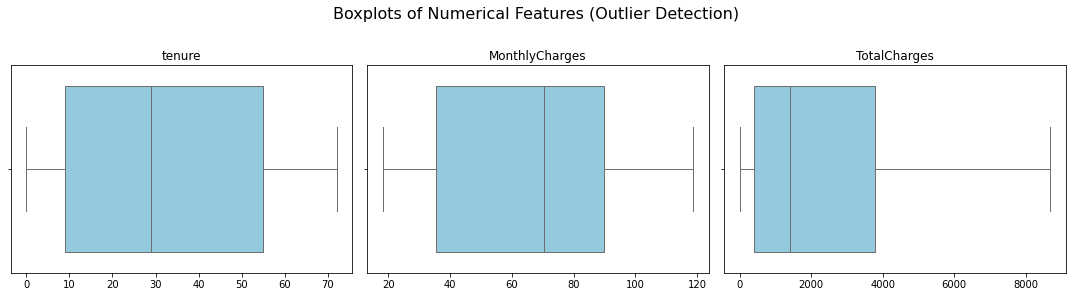

In [14]:
# Plot boxplots for all numeric columns (excluding binary)
def plot_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    non_binary_cols = [col for col in numeric_cols if df[col].nunique() > 2]

    # Set figure size based on number of columns
    n_cols = 3
    n_rows = -(-len(non_binary_cols) // n_cols)  # ceiling division

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    for i, col in enumerate(non_binary_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(col)
        plt.xlabel("")

    plt.suptitle("Boxplots of Numerical Features (Outlier Detection)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_outliers(df)


- The boxes are compact indicating that the numerical features are well distributed
- Whiskers span most of the data range  suggesting balanced spread 
- No extreme values were found across the numeric columns  

The boxplots confirm the earlier IQR analysis:  
The dataset is **clean, consistent and free from extreme outliers** for all numeric features analyzed


# **Exploratory Data Analysis (EDA)**
Univariate : distributions

Bivariate : churn comparison

Multivariate :  correlations

## 1. Univariate Analysis

We'll first look at numerical features with histograms then categorical ones with countplots

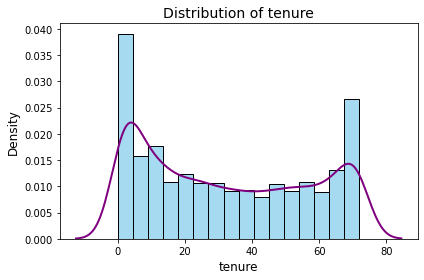

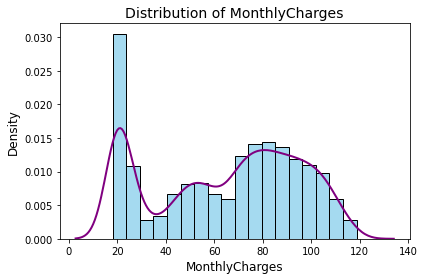

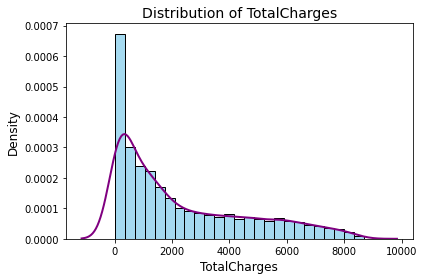

In [15]:
# Univariate Analysis for numeric columns
numeric_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    
    # Histogram with density instead of frequency
    sns.histplot(df[col].dropna(), bins='auto', color='skyblue', kde=False, stat='density', edgecolor='black')
    
    # KDE overlay
    sns.kdeplot(df[col].dropna(), color='purple', linewidth=2)
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.tight_layout()
    plt.show()


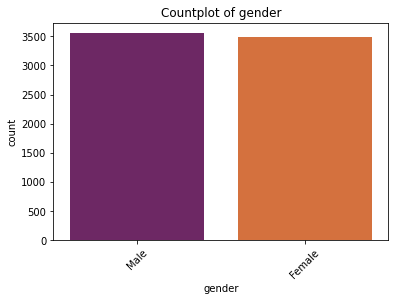

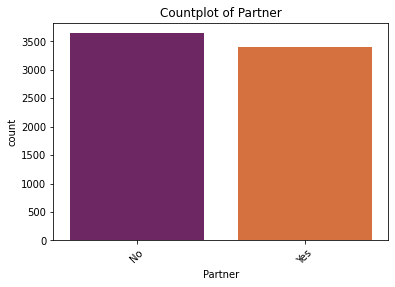

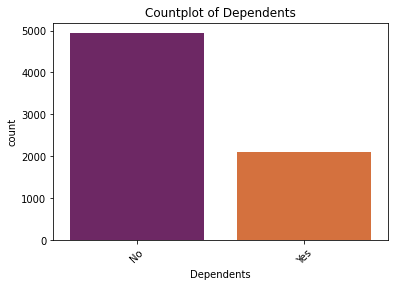

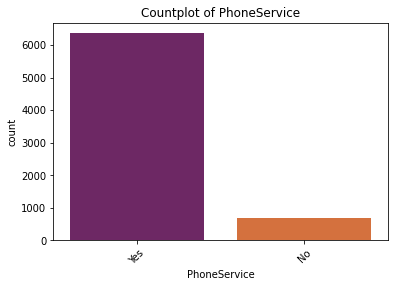

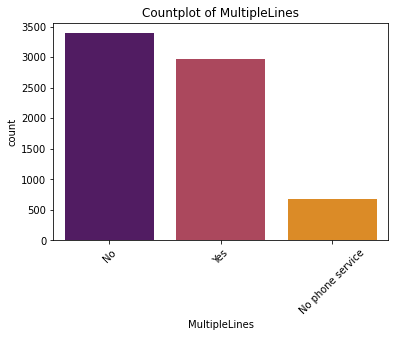

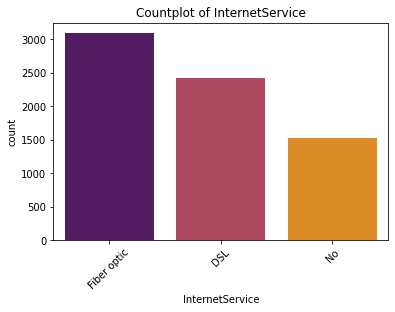

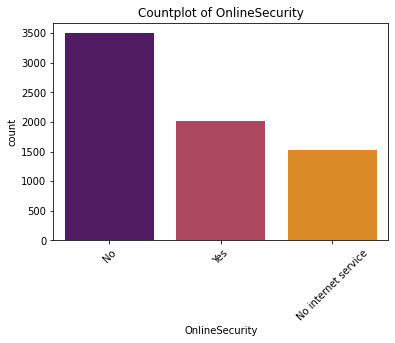

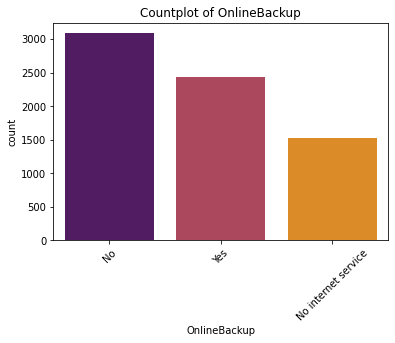

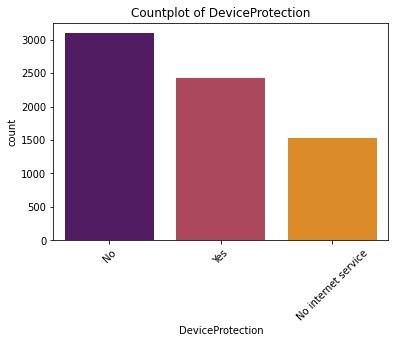

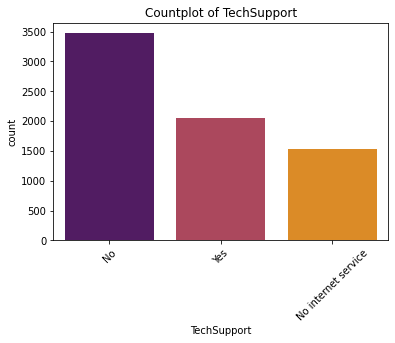

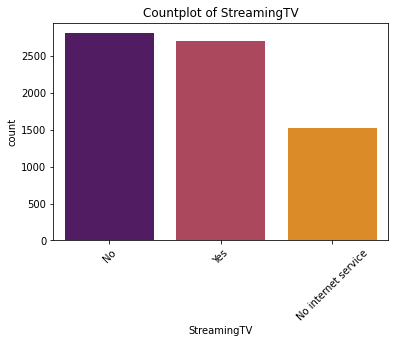

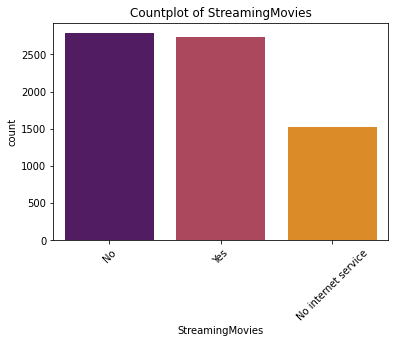

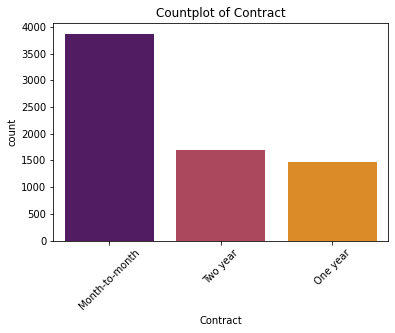

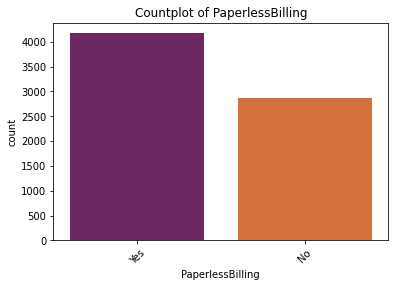

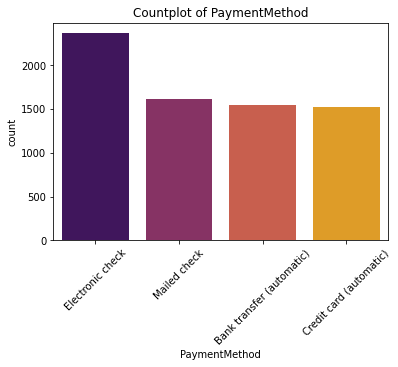

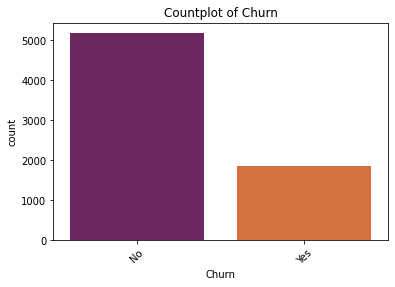

In [16]:
# Select categorical columns (excluding customerID)
categorical_columns = df.select_dtypes(include=['object']).drop(['customerID'], axis=1).columns

# Loop through and plot countplots
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="inferno")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()



# 2. Bivariate Analysis (Feature vs Target: Churn)

Let's see how features relate to churn

# Numeric features vs churn (boxplots)

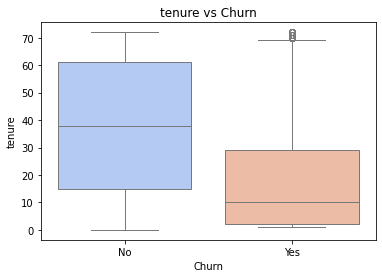

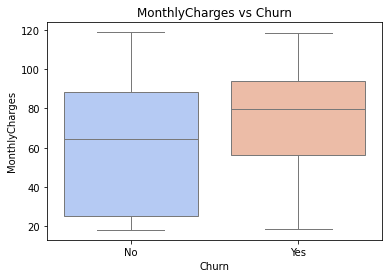

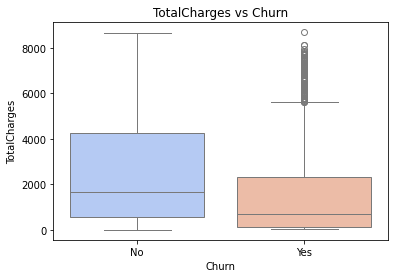

In [17]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, hue="Churn", data=df, palette="coolwarm", legend=False)
    plt.title(f"{col} vs Churn")
    plt.show()

# Categorical features vs churn

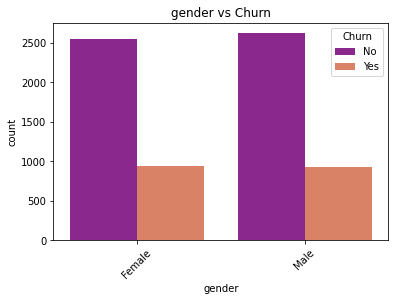

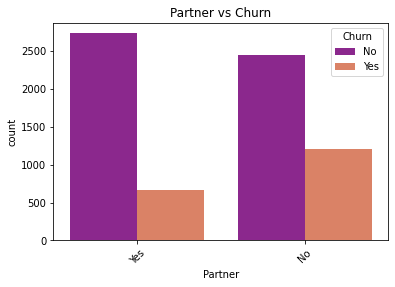

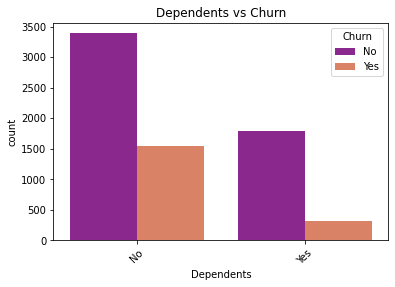

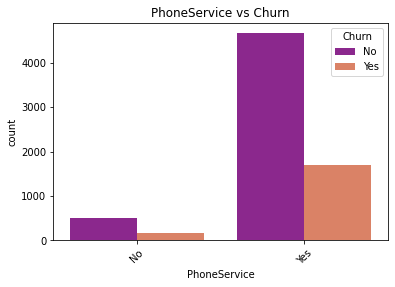

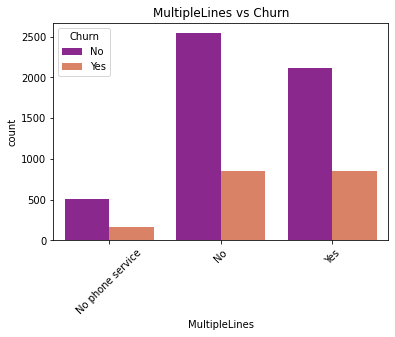

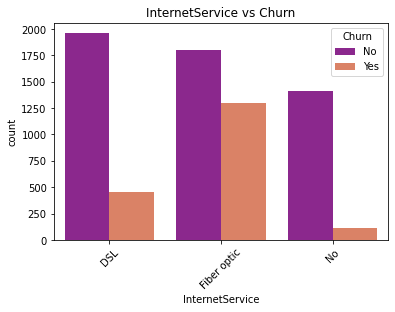

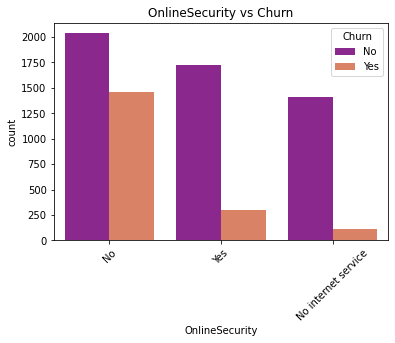

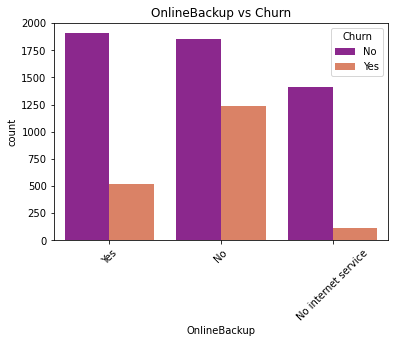

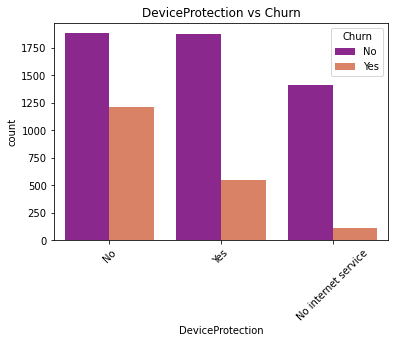

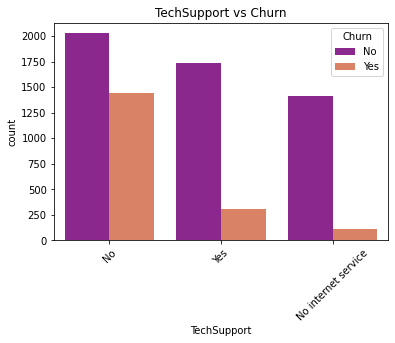

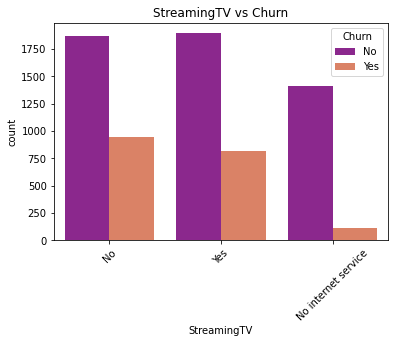

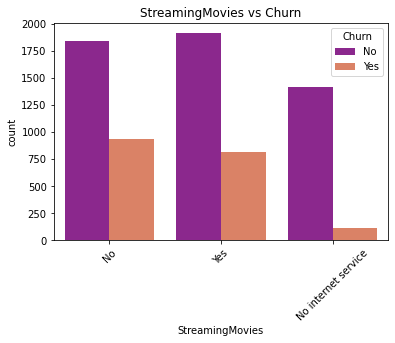

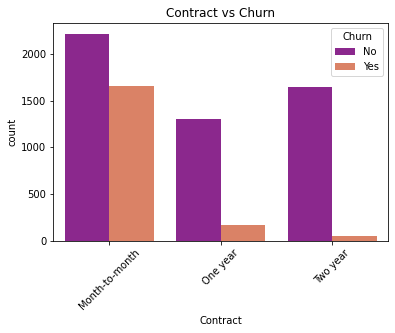

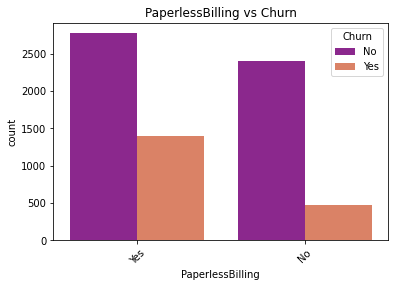

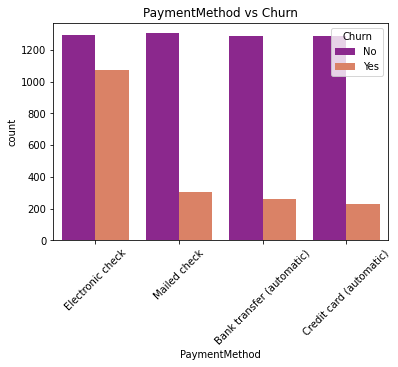

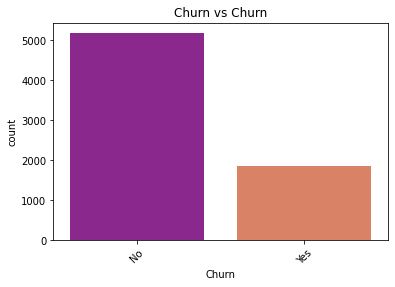

In [18]:
for col in categorical_columns:
    plt.figure(figsize=(6,4))

    sns.countplot(x=col, hue="Churn", data=df, palette= "plasma")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

# 3. Multivariate Analysis (Correlations & Heatmap)

# Correlation heatmap

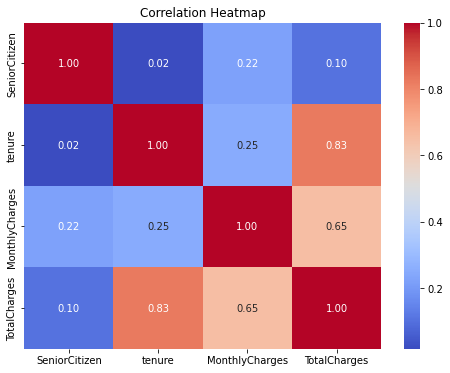

In [19]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


# **Feature Engineering**

Let's transform the raw dataset into a clean, numerical and model ready format

##  Drop Irrelevant Columns
Let's drop customerID since it's just an identifier and doesn't help  in prediction

In [20]:
df = df.drop(columns=['customerID'])


##  Encode Target Column

Let's Convert Churn from Yes/No to 1/0

In [21]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [22]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


# Creating New Engineered Features

Let's create new features

In [23]:
# Average monthly spend (handle division by zero)
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']
df['AvgMonthlySpend'] = df['AvgMonthlySpend'].replace([np.inf, np.nan], 0)

# Number of extra services
services = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df['NumServices'] = df[services].apply(lambda row: (row=='Yes').sum(), axis=1)

# Senior flag (already numeric but make sure it's 0/1)
df['IsSenior'] = df['SeniorCitizen'].apply(lambda x: 1 if x==1 else 0)

df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 70, float('inf')],
    labels=['0-1yr','1-2yr','2-4yr','4-6yr','6+yr'],
    include_lowest=True)

# Simplify payment types (optional example)
df['PaymentTypeSimple'] = df['PaymentMethod'].replace({
    'Bank transfer (automatic)': 'Bank',
    'Credit card (automatic)': 'Card',
    'Electronic check': 'E-check',
    'Mailed check': 'Check'})


In [24]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpend,NumServices,IsSenior,TenureGroup,PaymentTypeSimple
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,0,29.850000,1,0,0-1yr,E-check
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,0,55.573529,2,0,2-4yr,Check


In [25]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
AvgMonthlySpend      0
NumServices          0
IsSenior             0
TenureGroup          0
PaymentTypeSimple    0
dtype: int64

In [26]:
df['TenureGroup'].value_counts()

TenureGroup
0-1yr    2186
4-6yr    1707
2-4yr    1594
1-2yr    1024
6+yr      532
Name: count, dtype: int64

In [27]:
print(df['tenure'].max())
print(df['TenureGroup'].value_counts())

72
TenureGroup
0-1yr    2186
4-6yr    1707
2-4yr    1594
1-2yr    1024
6+yr      532
Name: count, dtype: int64


# Encoding + ColumnTransformer
# Encode Categorical Features
Let's turn all object columns into numbers using OneHotEncoder

In [28]:
categorical_cols = df.select_dtypes(include='object').drop(columns=['Churn'], errors='ignore').columns.tolist()
numeric_cols = df.select_dtypes(include=['int64','float64']).drop(columns=['Churn']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numeric_cols)])

# Define X and y

In [29]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Analyzing the target variable
- Let's visualize the frequency of each category in the churn feature to understand the distribution of churn classes in the dataset

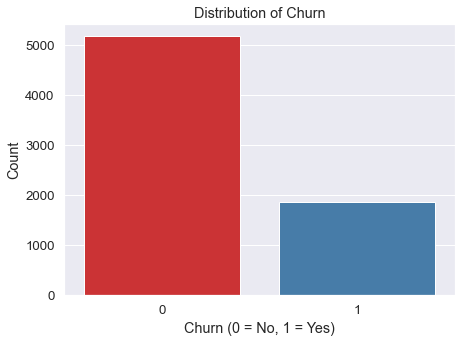

In [30]:
# Set font scale and style
sns.set(font_scale=1.2)
colors = sns.color_palette("Set1")

# Countplot of Churn
plt.figure(figsize=(7,5))
sns.countplot(x='Churn', data=df, palette=colors)

# Add labels
plt.title("Distribution of Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


- The plot shows that label 0 occurs more frequently than label 1  indicating class imbalance

##  Handle Class Imbalance

Let's check if Churn is imbalanced  and handle the imbalance Using SMOTE after splitting

In [31]:
# Count of each class
print(df['Churn'].value_counts())

# Percentage of each class
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


- The majority class is customers who **did not churn (No)** : about **73.5%** of the dataset  
- The minority class is customers who **did churn (Yes)** : about **26.5%** of the dataset
- This indicates a **significant class imbalance** and  training models directly on this data could bias them toward predicting `No`

---

###  Handling the Imbalance

- To address this imbalance, we will use **SMOTE (Synthetic Minority Oversampling Technique)** 
- **SMOTE** will generate **synthetic samples of the minority class (Yes)** **in the training set only**
- This will help our models **learn patterns from both classes more equally** and improve performance on minority class predictions


# Train-Test Split
Let's split first to prevent data leakage

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## Modeling Pipelines (SMOTE + Scaling + Model)
- We will  use imblearn.pipeline.Pipeline so SMOTE fits only on train folds and after encoding

# **MODELING**


##  Modeling Pipeline

We will train and evaluate multiple classification models using the cleaned and engineered features 

### Steps

- Add **StandardScaler** for numeric data to normalize values  
- Build and evaluate different classification models  
- Use **GridSearchCV** or **RandomizedSearchCV** for hyperparameter tuning  

---

###  Models 

| Model                | Purpose                               | Search Method         |
|----------------------|-----------------------------------------|--------------------------|
| **Logistic Regression**  | Baseline, simple & interpretable         | GridSearchCV             |
| **Decision Tree**         | Captures non-linear patterns              | GridSearchCV             |
| **Random Forest**         | Ensemble model (reduces variance)         | RandomizedSearchCV       |
| **Gradient Boosting**     | Boosting decision trees                    | GridSearchCV              |
| **XGBoost**                | High performance boosting                      | RandomizedSearchCV       |



##  Feature Scaling in the  Models  

In our modeling we  will **apply scaling only in Logistic Regression**  and **exclude scaling in all tree-based models** to keep our pipelines **clean, efficient and accurate**   
 

###  Scaler **ON** :  Logistic Regression  
- Logistic Regression relies on **gradient-based optimization**  
- We apply **`StandardScaler`** to ensure all features contribute equally

### Scaler **OFF** : Tree-Based Models  
(Applies to: Decision Tree, Random Forest, Gradient Boosting, XGBoost)  
- These models are **scale-invariant** since they split data by thresholds
- Scaling has **no effect** on their performance, so we skip it



# **Model 1**
# **Logistic Regression (Baseline)**

In [33]:
# pip install --upgrade threadpoolctl


In [34]:
# Logistic Regression Pipeline
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False for sparse matrices
    ('model', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))])

# Hyperparameter Grid
log_params = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs']}

# GridSearchCV
grid_log = GridSearchCV(
    log_reg,
    log_params,
    cv=5,
    scoring='recall',
    n_jobs= -1)


# Train 
grid_log.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBil...
                                                                         'passthrough',
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'AvgMonthlySpend',
                                                                          'NumServices',
                                                                          'IsSenior'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__solver': ['liblinear', 'lbfgs']},
             scoring='recall')

# **Model Evaluation**

In [35]:
# Predictions
y_pred = grid_log.predict(X_test)
y_prob = grid_log.predict_proba(X_test)[:, 1]


display(Markdown("## **Logistic Regression Results**"))

print("Best ROC-AUC Score (CV):", grid_log.best_score_)
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))

## **Logistic Regression Results**

Best ROC-AUC Score (CV): 0.8066889632107024
Test ROC-AUC: 0.8383864217623809

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409



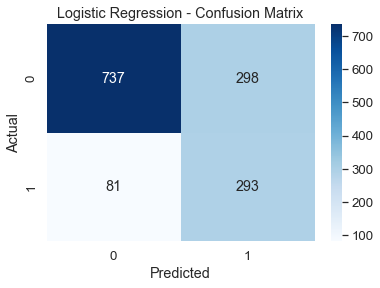

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

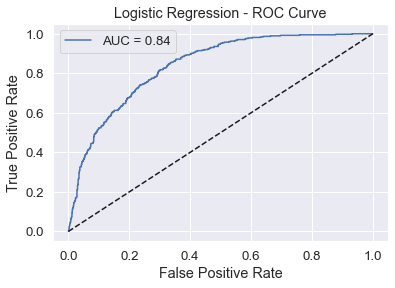

In [37]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.title("Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# **Model 2**
# **Decision Tree**

In [38]:
# Decision Tree Pipeline
dtree = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))])


# Hyperparameter Grid
dt_params = {
    'model__max_depth': [3,5,7,10],
    'model__min_samples_split': [2,5,10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['gini','entropy']}


# Train with GridSearchCV
grid_dt = GridSearchCV(dtree, 
                       dt_params,
                       cv=5, 
                       scoring='recall', 
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilli...
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'AvgMonthlySpend',
                                                                          'NumServices',
                                                                          'IsSenior'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [3, 5, 7, 10],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='recall')

# **Model Evaluation**

In [39]:
# Evaluate on Test Set
y_pred = grid_dt.best_estimator_.predict(X_test)
y_prob = grid_dt.best_estimator_.predict_proba(X_test)[:,1]

print("Decision Tree Results")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Decision Tree Results
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1035
           1       0.48      0.71      0.57       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.72      0.74      1409

ROC-AUC: 0.7931424216590457


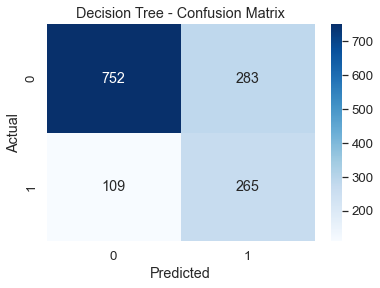

In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

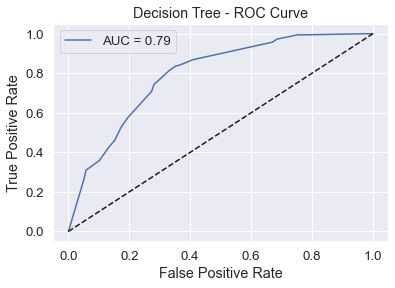

In [41]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.title("Decision Tree - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

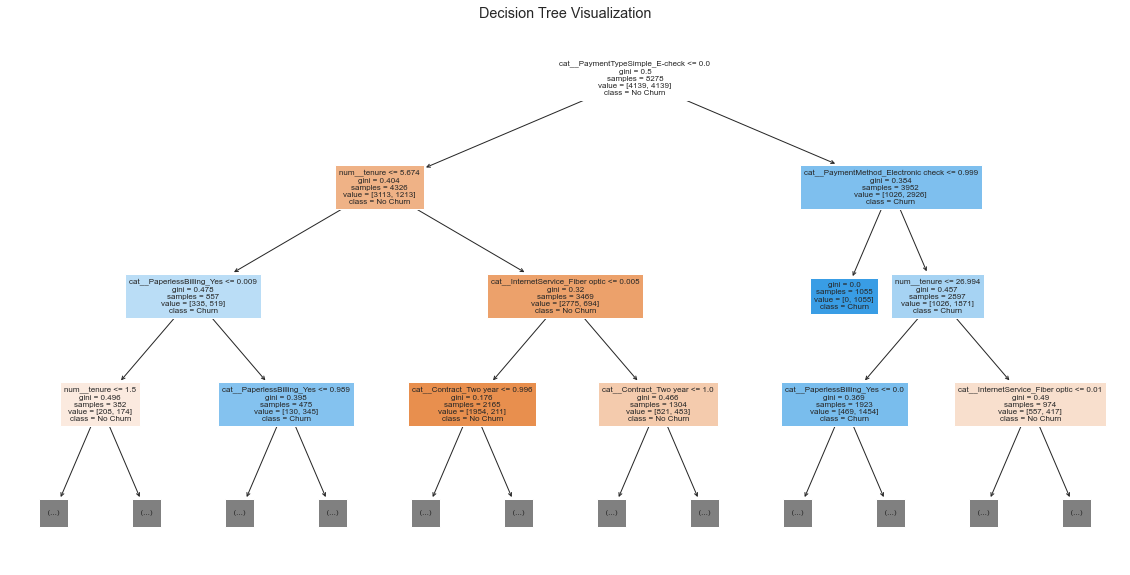

In [42]:
from sklearn import tree

# Get the best decision tree model from GridSearch
best_dt = grid_dt.best_estimator_.named_steps['model']

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt, 
               filled=True, 
               feature_names=grid_dt.best_estimator_.named_steps['preprocess'].get_feature_names_out(),
               class_names=['No Churn','Churn'],
               max_depth = 3,
               fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()


# **Model 3**
# **Random Forest**

In [43]:
# Random Forest Pipeline
rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))])

# Hyperparameter grid for RandomizedSearchCV
rf_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15, None],   
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ["sqrt", "log2"]}

# Randomized Search
rand_rf = RandomizedSearchCV(
    rf,
    rf_params,
    cv=5,
    scoring="recall",
    n_jobs=-1,
    n_iter=10,
    random_state=42)

# Train
rand_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['gender',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'PhoneService',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'StreamingTV',
                                                                                'StreamingMovies',
                                                                                'Contract',
                                                                                'Paperles...
                                                                                'NumServices',
                                                                                'IsSenior'])])),
                                             ('smote', SMOTE(random_state=42)),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [5, 10, 15, None],
                                        'model__max_features': ['sqrt', 'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300]},
                   random_state=42, scoring='recall')

# **Model Evaluation**

In [44]:
# Evaluate on Test Set
y_pred = rand_rf.best_estimator_.predict(X_test)
y_prob = rand_rf.best_estimator_.predict_proba(X_test)[:, 1]

print("Random Forest Results")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Random Forest Results
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.56      0.67      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

ROC-AUC: 0.8325118189568317


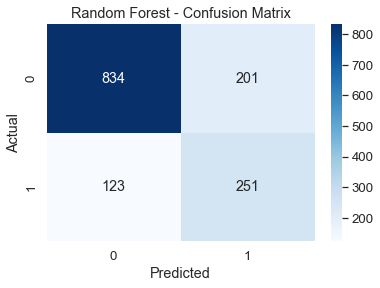

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

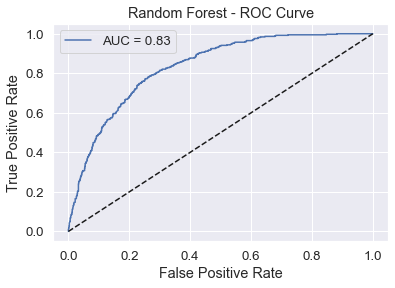

In [46]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Feature Importance

<Figure size 720x432 with 0 Axes>

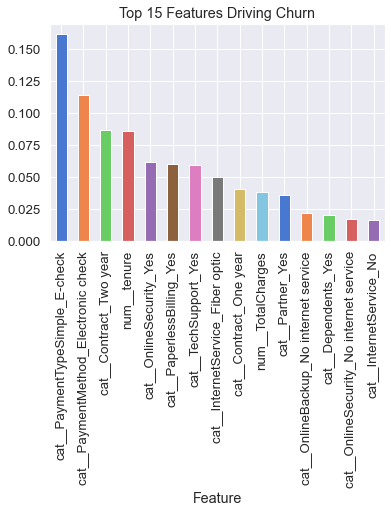

In [47]:
# Extract the trained RF model
rf_model = rand_rf.best_estimator_.named_steps["model"]

# Extract feature names
features = rand_rf.best_estimator_.named_steps["preprocess"].get_feature_names_out()

# Feature importance
importances = rf_model.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
palette = sns.color_palette("muted", 15)
feat_imp.head(15).plot.bar(x="Feature", y="Importance", legend=False,color = palette)
plt.title("Top 15 Features Driving Churn")
plt.show();


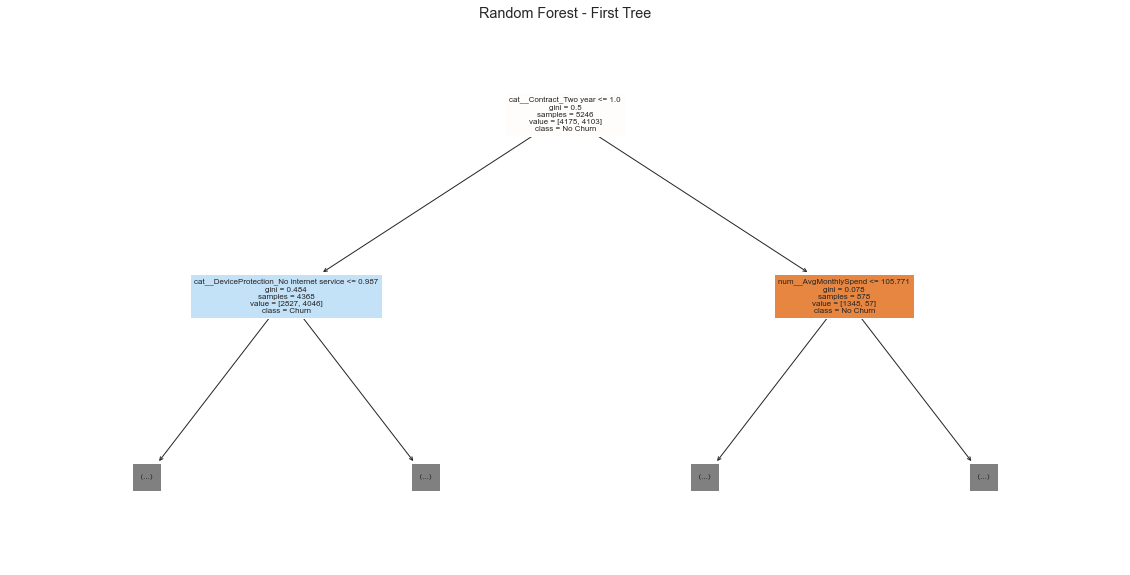

In [48]:
# Extract the trained Random Forest model
best_rf = rand_rf.best_estimator_.named_steps['model']

# Plot the first tree in the forest
plt.figure(figsize=(20,10))
tree.plot_tree(best_rf.estimators_[0], 
               filled=True, 
               feature_names=rand_rf.best_estimator_.named_steps['preprocess'].get_feature_names_out(),
               class_names=['No Churn','Churn'],
               max_depth = 1,
               fontsize=8)
plt.title("Random Forest - First Tree")
plt.show()


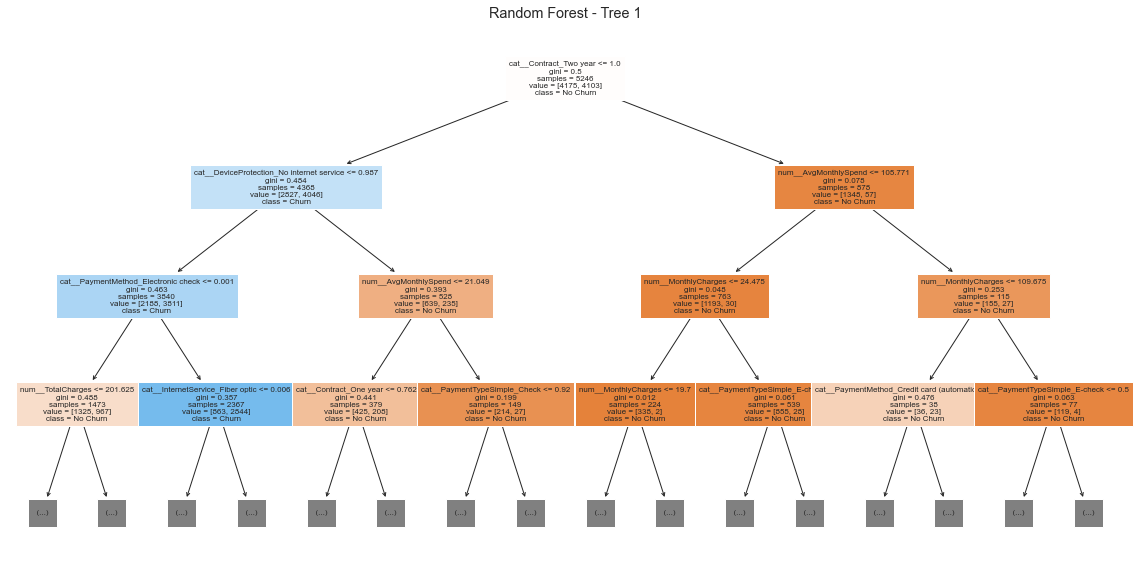

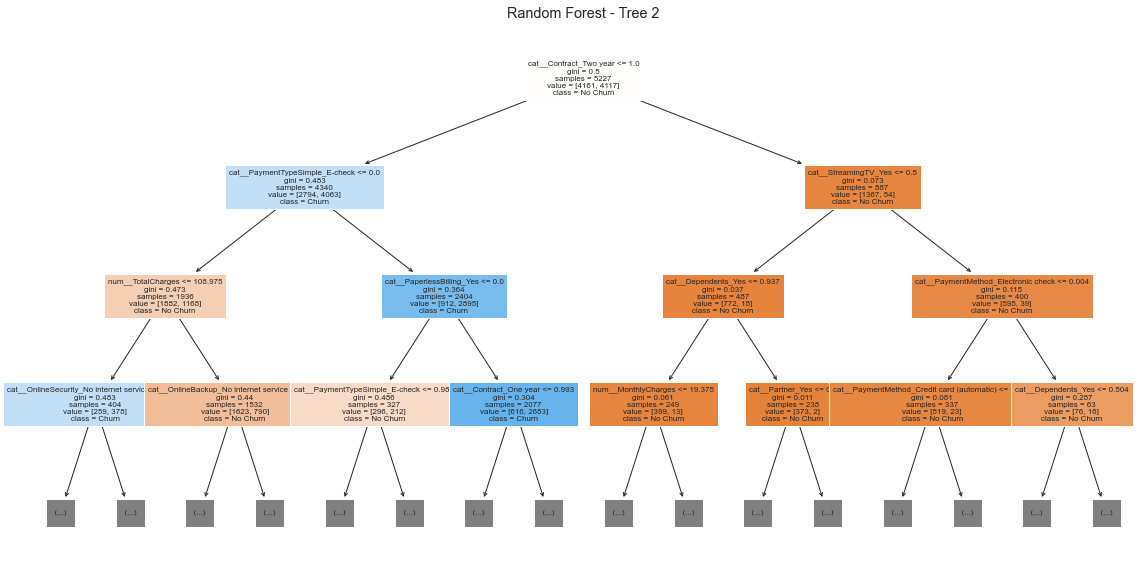

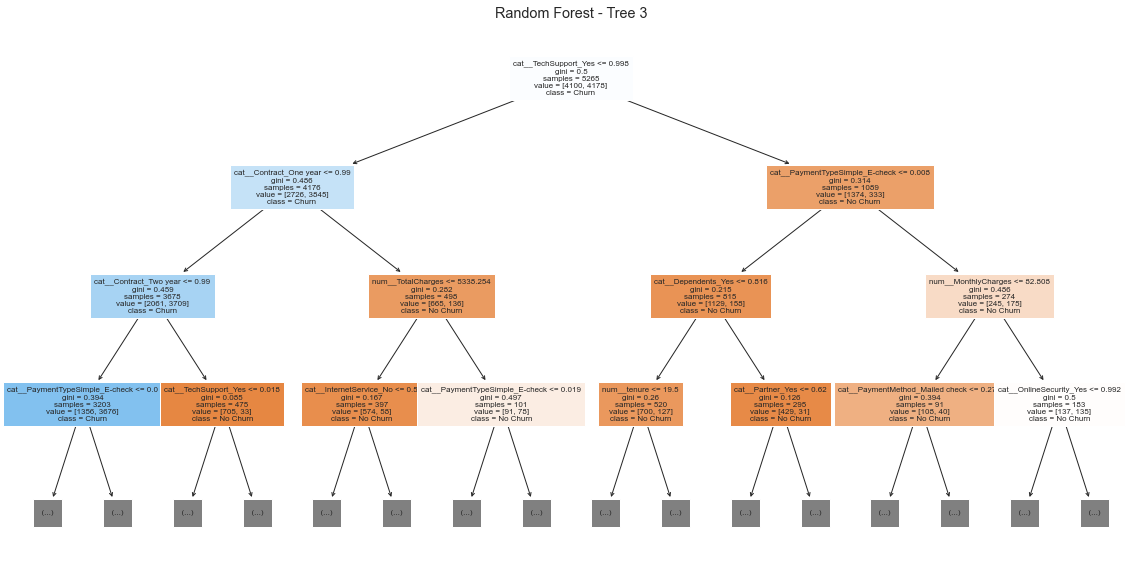

In [49]:
for i in range(3):  # plot first 3 trees
    plt.figure(figsize=(20,10))
    tree.plot_tree(best_rf.estimators_[i], 
                   filled=True, 
                   feature_names=rand_rf.best_estimator_.named_steps['preprocess'].get_feature_names_out(),
                   class_names=['No Churn','Churn'],
                   max_depth=3,
                   fontsize=8)
    plt.title(f"Random Forest - Tree {i+1}")
    plt.show()


# **Model 4**
# **Gradient Boosting**

In [50]:
# Gradient Boosting Pipeline
gb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))])

# Hyperparameter Grid
gb_params = {
    'model__n_estimators': [100,200],
    'model__learning_rate': [0.05,0.1,0.2],
    'model__max_depth': [3,5]}

# Train with GridSearchCV
grid_gb = GridSearchCV(gb, 
                       gb_params,
                       cv=5, 
                       scoring='recall',
                       n_jobs=-1)

grid_gb.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilli...
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'AvgMonthlySpend',
                                                                          'NumServices',
                                                                          'IsSenior'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [3, 5],
                         'model__n_estimators': [100, 200]},
             scoring='recall')

# **Model Evaluation**

In [51]:
# Evaluate on Test Set
y_pred = grid_gb.best_estimator_.predict(X_test)
y_prob = grid_gb.best_estimator_.predict_proba(X_test)[:,1]

print("Gradient Boosting Results")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Gradient Boosting Results
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1035
           1       0.59      0.64      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC: 0.8433736340385957


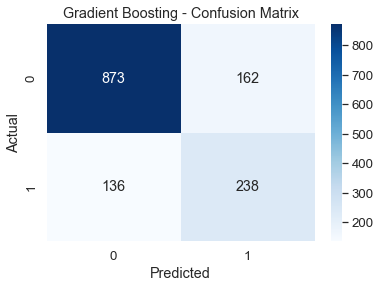

In [52]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

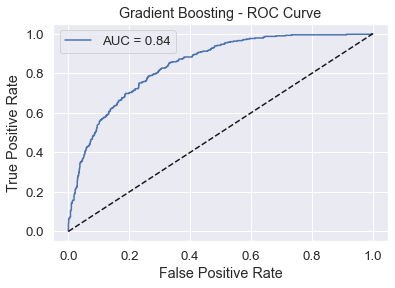

In [53]:
# Roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.title("Gradient Boosting - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# **Model 5**
# **XGBoost**

In [54]:
# XGBoost Pipeline
xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])


# Hyperparameter Grid

xgb_params = {
    'model__n_estimators': [100,200,300],
    'model__learning_rate': [0.05,0.1,0.2],
    'model__max_depth': [3,5,7]}


# Train with RandomizedSearchCV
rand_xgb = RandomizedSearchCV(xgb, 
                              xgb_params, 
                              cv=5, 
                              scoring='recall',
                              n_jobs=-1, 
                              n_iter=10, 
                              random_state=42)

rand_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['gender',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'PhoneService',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'StreamingTV',
                                                                                'StreamingMovies',
                                                                                'Contract',
                                                                                'Paperles...
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.05, 0.1,
                                                                 0.2],
                                        'model__max_depth': [3, 5, 7],
                                        'model__n_estimators': [100, 200, 300]},
                   random_state=42, scoring='recall')

# **Model Evaluation**

In [55]:
# Evaluate on Test Set
y_pred = rand_xgb.best_estimator_.predict(X_test)
y_prob = rand_xgb.best_estimator_.predict_proba(X_test)[:,1]

print("XGBoost Results")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

XGBoost Results
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.59      0.65      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC: 0.8423919501924616


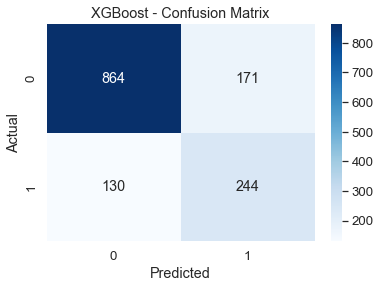

In [56]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

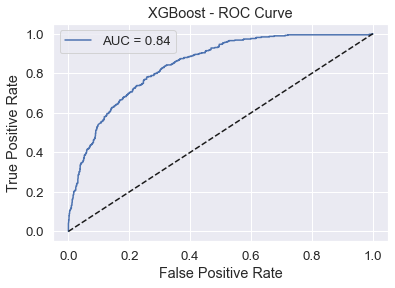

In [57]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.title("XGBoost - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# **Model 6**
# **LightGBM**

In [58]:
!pip install lightgbm


In [59]:
pip install --upgrade --force-reinstall matplotlib wordcloud


  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached wordcloud-1.9.4-cp38-cp38-win_amd64.whl.metadata (3.5 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp38-cp38-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl.metadata (6.4 kB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\harriet\\anaconda3\\envs\\learn-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.




  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached zipp-3.20.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
Using cached wordcloud-1.9.4-cp38-cp38-win_amd64.whl (300 kB)
Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp38-cp38-win_amd64.whl (1.5 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl (55 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
Using cached packaging-25.0-py3-none-any.whl (66 kB)
Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
Using cached zi

In [60]:
from lightgbm import LGBMClassifier

lgbm = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),  
    ("classifier", LGBMClassifier(random_state=42, verbose=-1))
])


# Hyperparameter grid
param_grid = {
    "classifier__n_estimators": [100, 300, 500],
    "classifier__max_depth": [-1, 5, 10],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__num_leaves": [31, 50, 100]}

# GridSearchCV
lgbm_cv = GridSearchCV(
    lgbm,
    param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1)

# Fit model
lgbm_cv.fit(X_train, y_train)
print("\nBest Parameters:", lgbm_cv.best_params_)



Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__num_leaves': 31}


# Evaluation on Test Set

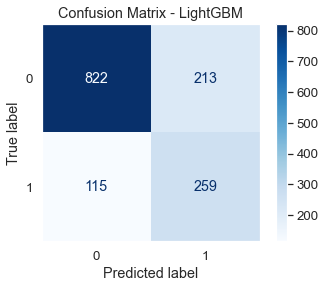

Classification Report - LightGBM
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.69      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409



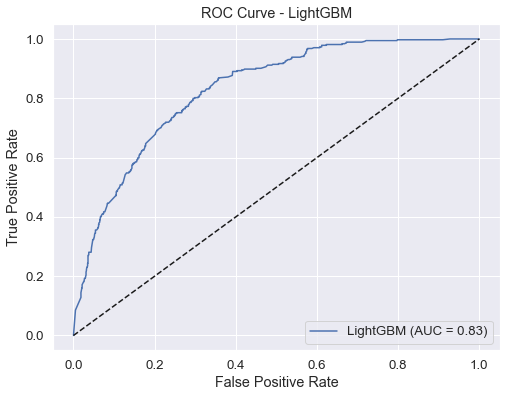

In [61]:
# Predictions
y_pred = lgbm_cv.predict(X_test)
y_prob = lgbm_cv.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_cv.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - LightGBM")
plt.grid(False)   # Remove grid
plt.show()

# Classification Report
print("Classification Report - LightGBM")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend(loc="lower right")
plt.show()


### **Model Comparison on Recall and Precision** 

- Since our primary goal is to maximize **recall** (catching as many churners as possible), we compare all 6 models on their recall scores 
- However, high recall alone can be misleading if **precision** is too low (too many false positives) 

- To balance this, we also calculate **precision** for each model and display both metrics side by side in a summary table.  
- This allows us to quickly identify models that not only catch churners but also minimize false alarms 

In [64]:
from sklearn.metrics import precision_score, recall_score

results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", 
              "Gradient Boosting", "XGBoost", "LightGBM"],
    
    "Recall": [
        recall_score(y_test, grid_log.predict(X_test)),   # Logistic Regression
        recall_score(y_test, grid_dt.predict(X_test)),    # Decision Tree
        recall_score(y_test, rand_rf.predict(X_test)),    # Random Forest
        recall_score(y_test, grid_gb.predict(X_test)),    # Gradient Boosting
        recall_score(y_test, rand_xgb.predict(X_test)),   # XGBoost
        recall_score(y_test, lgbm_cv.predict(X_test))     # LightGBM
    ],
    
    "Precision": [
        precision_score(y_test, grid_log.predict(X_test)),
        precision_score(y_test, grid_dt.predict(X_test)),
        precision_score(y_test, rand_rf.predict(X_test)),
        precision_score(y_test, grid_gb.predict(X_test)),
        precision_score(y_test, rand_xgb.predict(X_test)),
        precision_score(y_test, lgbm_cv.predict(X_test))
    ]
}

# Put results into a DataFrame
results_df = pd.DataFrame(results).sort_values("Recall", ascending=False)
print(results_df)




                 Model    Recall  Precision
0  Logistic Regression  0.783422   0.495770
1        Decision Tree  0.708556   0.483577
5             LightGBM  0.692513   0.548729
2        Random Forest  0.671123   0.555310
4              XGBoost  0.652406   0.587952
3    Gradient Boosting  0.636364   0.595000


In [ ]:
lkjhgfdsasdfghjkl;



# **MODEL INTERPRETABILITY**

# **SHAP**

In [ ]:
# !pip install shap


SHAP - Logistic Regression (Global)


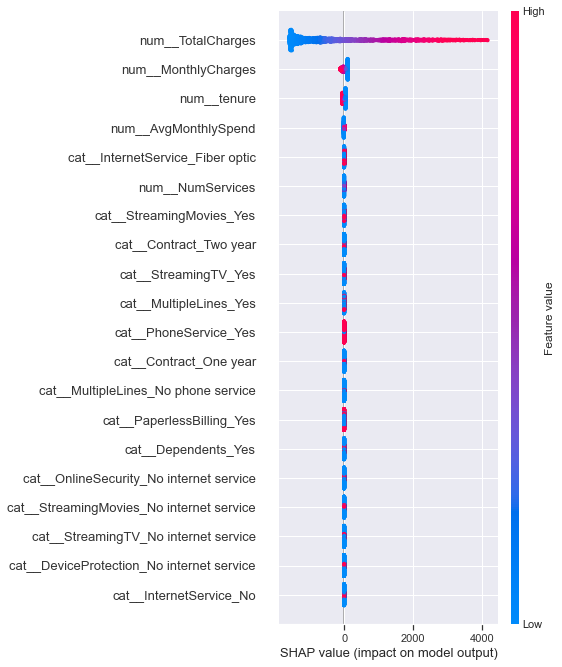

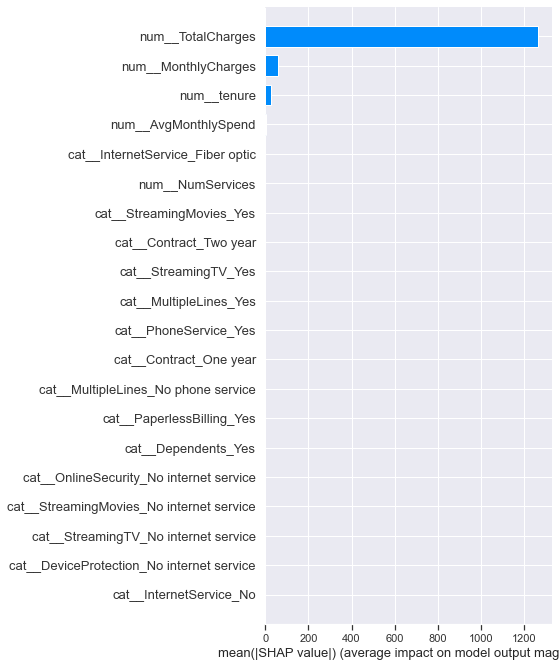

SHAP - Logistic Regression (Local Example)


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


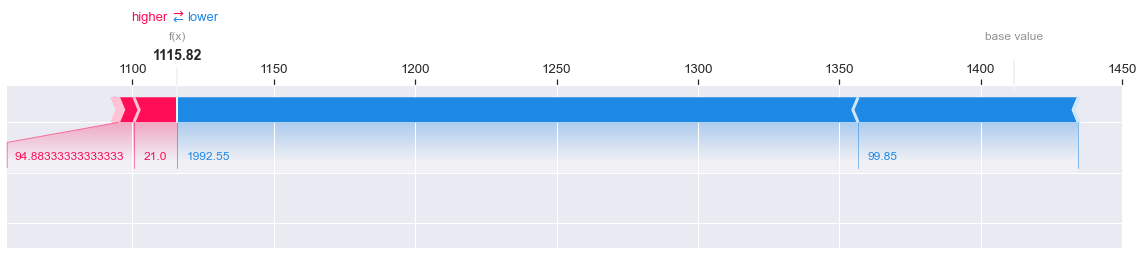

SHAP - LightGBM (Global)


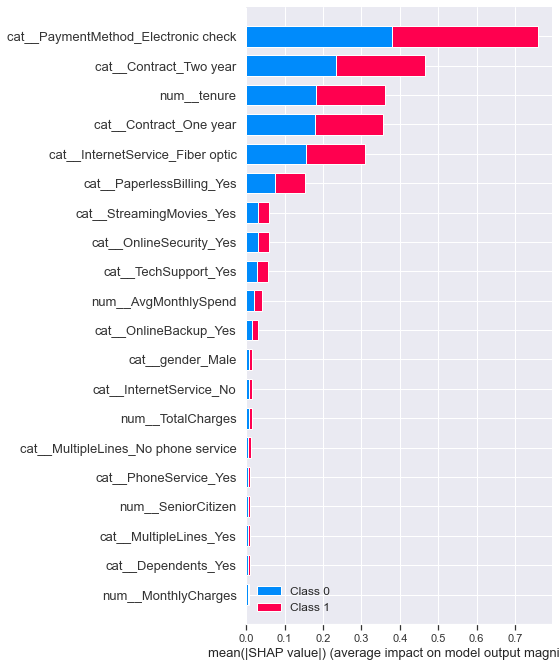

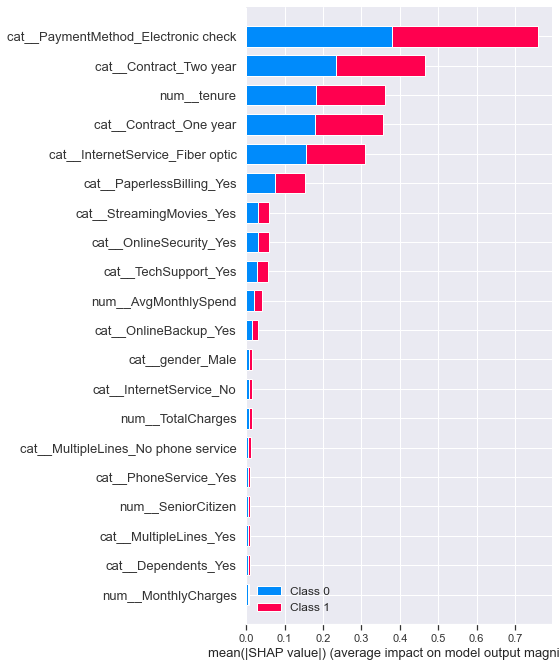

SHAP - LightGBM (Local Example)


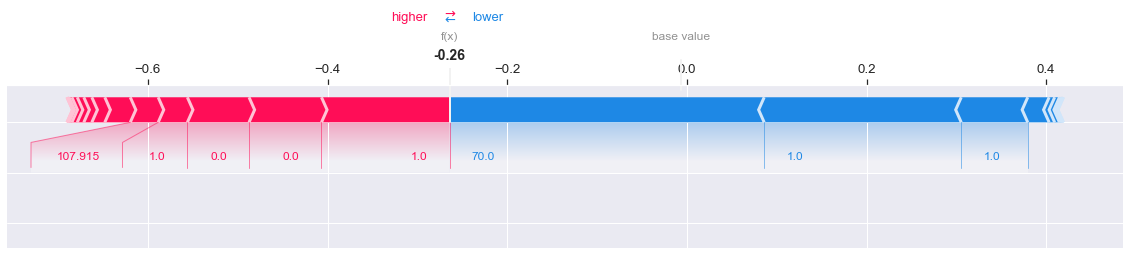

KeyError: 'classifier'

In [66]:
# ==========================
# MODEL INTERPRETABILITY - SHAP
# ==========================

import shap
import matplotlib.pyplot as plt

shap.initjs()

# ----------------------------
# Prepare transformed data (numeric only)
# ----------------------------
preprocessor = grid_log.best_estimator_.named_steps['preprocessor']

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed  = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

# ----------------------------
# Logistic Regression (LinearExplainer)
# ----------------------------
log_model = grid_log.best_estimator_.named_steps['model']

explainer_log = shap.LinearExplainer(log_model, X_train_transformed)
shap_values_log = explainer_log.shap_values(X_test_transformed)

print("SHAP - Logistic Regression (Global)")
shap.summary_plot(shap_values_log, X_test_transformed, feature_names=feature_names)  # dot summary
shap.summary_plot(shap_values_log, X_test_transformed, feature_names=feature_names, plot_type="bar")  # bar importance

print("SHAP - Logistic Regression (Local Example)")
i = 5
shap.force_plot(explainer_log.expected_value, shap_values_log[i, :], 
                X_test_transformed[i, :], matplotlib=True)


# ----------------------------
# LightGBM (TreeExplainer)
# ----------------------------
lgbm_model = lgbm_cv.best_estimator_.named_steps['classifier']

explainer_lgbm = shap.TreeExplainer(lgbm_model)
shap_values_lgbm = explainer_lgbm.shap_values(X_test_transformed)

print("SHAP - LightGBM (Global)")
shap.summary_plot(shap_values_lgbm, X_test_transformed, feature_names=feature_names)  # dot summary
shap.summary_plot(shap_values_lgbm, X_test_transformed, feature_names=feature_names, plot_type="bar")  # bar importance

print("SHAP - LightGBM (Local Example)")
i = 10
shap.force_plot(explainer_lgbm.expected_value[1], shap_values_lgbm[1][i, :], 
                X_test_transformed[i, :], matplotlib=True)


# ----------------------------
# XGBoost (TreeExplainer)
# ----------------------------
xgb_model = rand_xgb.best_estimator_.named_steps['classifier']

explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_transformed)

print("SHAP - XGBoost (Global)")
shap.summary_plot(shap_values_xgb, X_test_transformed, feature_names=feature_names)  # dot summary
shap.summary_plot(shap_values_xgb, X_test_transformed, feature_names=feature_names, plot_type="bar")  # bar importance

print("SHAP - XGBoost (Local Example)")
i = 20
shap.force_plot(explainer_xgb.expected_value[1], shap_values_xgb[1][i, :], 
                X_test_transformed[i, :], matplotlib=True)


# This will give you two SHAP plots per model:

Dot summary plot → shows feature influence & distribution.

Bar plot → global importance (mean absolute SHAP values).